<h3 style="text-align: center; ">★ Iphone Users EDA + Model Comparison on Sentiment Analysis ★</h3>


### This project provides an analysis of customer sentiment towards iPhone products based on reviews collected across multiple continents, including APAC, EMEA, and the United States. Using a comprehensive dataset, the relationships between various product features (e.g., variant, verification status, and country/continent) and customer ratings are explored. The study leverages machine learning models, traditional classification methods, and modern large language models (LLMs) to assess sentiment and identify key factors contributing to customer satisfaction or dissatisfaction (Devlin et al., 2018; Le & Mikolov, 2014).
### In addition to conventional sentiment analysis, clustering techniques are used to explore how customer sentiments differ across geographic regions. Country-based sentiment clustering aims to uncover distinct user preferences, satisfaction levels, and trends that may vary by country, providing valuable insights into how geographic location affects product perception.
### Hypothesis testing is applied to assess the statistical significance of differences in sentiment based on various product attributes, enabling a deeper understanding of user behavior. By combining predictive modeling, hypothesis testing, and clustering, the solution offers a detailed examination of customer preferences, supporting data-driven decision-making for targeted improvements and marketing strategies (Mikolov et al., 2013; Pennington et al., 2014).

##Problem Statement
The purpose of this analysis is to understand customer sentiment regarding iPhone products and identify the major factors influencing customer satisfaction or dissatisfaction across different regions and product variants. The specific objectives of this project are as follows:
1. Understand Sentiment Variation Across Countries or Continents:
○ Perform country-based sentiment analysis using clustering to determine how
customer satisfaction levels differ by region.
○ Identify country-specific clusters of customers with similar sentiments to
understand the unique needs and preferences in each geographic area.
2. Identify Key Factors Influencing Ratings:
○ Analyze relationships between different product features (e.g., color, size, service provider) and customer ratings to identify attributes that have the greatest influence on sentiment.
○ Conduct hypothesis testing to validate the statistical significance of observed differences in sentiment based on country, product variant, and verification status (Le & Mikolov, 2014).
3. Compare Traditional Machine Learning Models with LLMs for Sentiment Prediction:
○ Compare the efficacy of traditional machine learning models (e.g., Random Forest, Logistic Regression) with fine-tuned large language models (e.g., DistilBERT) for predicting customer sentiment.
○ Evaluate each model’s ability to interpret complex language, understand context, and classify sentiment (Collobert et al., 2011).
4. Temporal Trends Analysis:
○ Investigate temporal trends to understand how sentiment and ratings evolve over
time (e.g., during product release cycles or seasonal effects).

##Clustering for Country-Based Sentiment Analysis
To address research questions related to geographic differences in customer sentiment, clustering techniques will be employed. By applying unsupervised clustering methods such as K-Means or Hierarchical Clustering to customer reviews, the study aims to identify groups of countries that exhibit similar sentiment patterns toward the product (Lloyd, 1982). By forming clusters based on sentiment, the analysis will:
● Identify geographic regions where customers report high or low satisfaction levels.
● Understand regional preferences, which could be influenced by factors like pricing,
cultural differences, or consumer expectations.
This clustering approach, combined with sentiment analysis, will support the development of targeted marketing strategies, product customization, and feature improvements that cater to regional preferences.

##Dataset Overview
### The dataset used in this study comprises 3,062 reviews with 11 features, including product variant, country, rating score, and review text. Reviews span multiple geographic regions and are dated from 2021 to Fall 2024.

● Total Entries: 3,062
● Number of Columns: 11 Features:
1. productAsin: Product identifier for the iPhone variant.
2. country: Country where the review was written.
3. date: Date of the review.
4. isVerified: Indicates whether the review is verified.

5. ratingScore: Rating given by the reviewer (integer values).
6. reviewTitle: Title of the review.
7. reviewDescription: Detailed description of the review (with some missing values).
8. reviewUrl: URL of the review (with some missing values).
9. reviewedIn: Details on where and when the review was conducted.
10. variant: Information about the product variant, including color and size.
11. variantAsin: Identifier for the product variant.


##Algorithms to be utilized for answering key research questions
Clustering: K-Means, K-Means++
Classification: Logistic Regression, Decision Tree, Random Forest NLP: Distilbert

##Analysis Overview:
###1. Preprocessing (Dataset Cleaning) :
○ Perform data cleaning, handling missing values, and normalization to prepare the
dataset for analysis.
### 2. Exploratory Data Analysis (EDA):
○ Perform clustering and hypothesis testing to gain insight into the data.
○ Use K-Means clustering to evaluate and compare performance (e.g., KNN,
etc.).
### 3. Storage Size-Based Analysis (Clustering):
○ Analyze different storage sizes (e.g., 128GB, 256GB) for their popularity across various regions.
### 4. Classification:
○ Use Logistic Regression, Decision Tree, and Random Forest models for
classification tasks (Phase 1).
### 5. Natural Language Processing (NLP):
○ Utilize models such as BERT for advanced sentiment classification.
○ Perform in-depth analysis at different time intervals to understand changes in
sentiment and rating.
### 6. Temporal Analysis:
○ One Month After Release: Analyze sentiment immediately after release to determine skew and limitations of the dataset.
○ Two Months After Release: Evaluate changes in sentiment.
○ One Year After Release: Perform a detailed analysis, including metrics such as
confusion matrices and heatmaps.
### 7. Modeling Comparison:

○ Compare different models for their efficiency in sentiment prediction, accuracy, and ability to handle context effectively.


In [1]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1cd4971d438cf1be96a723ea262fe1048b7f92d25928d2e5f00dbb4b307125e1
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


---

##1. Preprocessing (Dataset Cleaning) :
○ Perform data cleaning, handling missing values, and normalization to prepare the dataset for analysis.

## **Load the Dataset**
1. **Load the Dataset**  
   - Import the necessary libraries and load the dataset into a DataFrame.

In [4]:
# Install necessary libraries
!pip install -U -q PyDrive

# Import necessary libraries
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Get the file ID from the shared link
file_id = '1gRIm-uMuHHWFCA6c9BmgTGbe2xwJh6Bo'

# Download the file from Google Drive
downloaded_file = drive.CreateFile({'id': file_id})
downloaded_file.GetContentFile('iphone.csv')

# Now you can read the CSV file
df = pd.read_csv("iphone.csv")
print(df.shape)
df.head()

(3062, 11)


,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98


In [5]:
# Print the feature info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   productAsin        3062 non-null   object
 1   country            3062 non-null   object
 2   date               3062 non-null   object
 3   isVerified         3062 non-null   bool  
 4   ratingScore        3062 non-null   int64 
 5   reviewTitle        3062 non-null   object
 6   reviewDescription  2976 non-null   object
 7   reviewUrl          3046 non-null   object
 8   reviewedIn         3062 non-null   object
 9   variant            3062 non-null   object
 10  variantAsin        3062 non-null   object
dtypes: bool(1), int64(1), object(9)
memory usage: 242.3+ KB


## **Check for Missing Values & Duplicates**
Check for Missing Values

Identify any missing values in the dataset and calculate the percentage of missing data for each column.
3. **Check for Duplicates**  
   - Determine if there are any duplicate rows in the dataset and remove them if found.

In [6]:
# print the shape, remove missing values and duplicates
print(f"Rows: {df.shape[0]} , Columns: {df.shape[1]}.")


if df.isnull().sum().sum()-0:
    print("There are missing values in the dataframe.")
    null_df = df.isnull().sum()
    print(null_df[null_df > 0])

else:
    print("There are no missing values in the dataframe.")
    print(dash_lines)

if df.duplicated().sum()-0:
    print("There are duplicate values in the dataframe.")
    dupl_df = df.duplicated().sum()
    print(dupl_df[dupl_df > 0])

else:
    print("There are no duplicate values in the dataframe.")




Rows: 3062 , Columns: 11.
There are missing values in the dataframe.
reviewDescription    86
reviewUrl            16
dtype: int64
There are no duplicate values in the dataframe.


In [7]:
#information of unique values of features
df.apply(lambda x: [x.nunique(), x.unique()]).T

,0,1
productAsin,7,"[B09G9BL5CP, B09P82T3PZ, B09G9J5JZX, B0CHX1W1X..."
country,7,"[India, Japan, United Arab Emirates, Egypt, Un..."
date,789,"[11-08-2024, 16-08-2024, 14-05-2024, 24-06-202..."
isVerified,2,"[True, False]"
ratingScore,5,"[4, 5, 3, 2, 1]"
reviewTitle,2018,"[No charger, iPhone 13 256GB, Flip camera opti..."
reviewDescription,2297,"[Every thing is good about iPhones, there's no..."
reviewUrl,2460,[https://www.amazon.in/gp/customer-reviews/R34...
reviewedIn,1255,"[Reviewed in India on 11 August 2024, Reviewed..."
variant,86,"[Colour: MidnightSize: 256 GB, Colour: PinkSiz..."


##2. Exploratory Data Analysis (EDA):
○ Perform clustering and hypothesis testing to gain insight into the data. ○ Use K-Means clustering to evaluate.

## Statistical Analysis

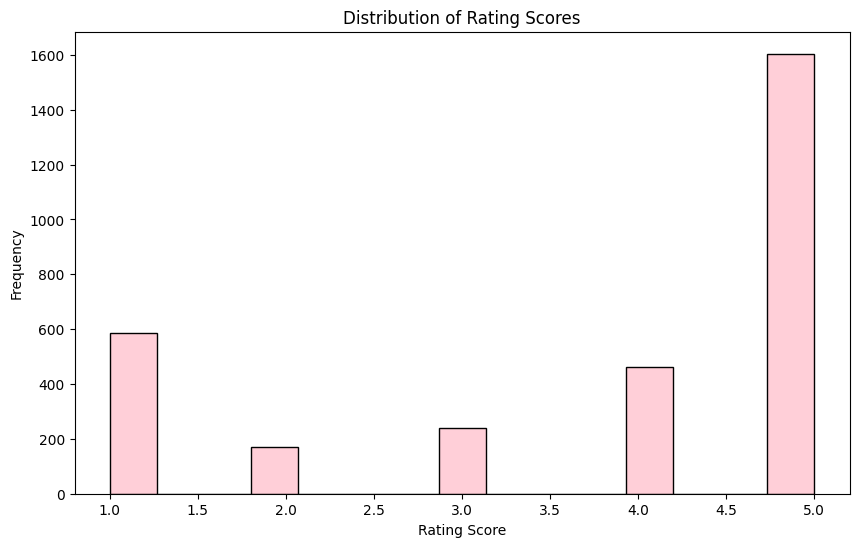

In [8]:
# Perform Statistical analysis and poisson distribution on the rating score.
# to know the frequency on distribution.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm, poisson

# Plot the distribution of 'ratingScore'
plt.figure(figsize=(10, 6))
sns.histplot(df['ratingScore'],color='pink')
plt.title('Distribution of Rating Scores')
plt.xlabel('Rating Score')
plt.ylabel('Frequency')
plt.show()




In [9]:
# Rating descriptive statistics - Mean, Median and Mode

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm, poisson

# Calculate mean, median, and mode of 'ratingScore'
mean_rating = df['ratingScore'].mean()  # Calculate mean and assign to variable
median_rating = df['ratingScore'].median()  # Calculate median and assign to variable
mode_rating = df['ratingScore'].mode()[0]  # Calculate mode and assign to variable


# Calculate and print descriptive statistics
print(f"Mean Rating: {mean_rating:.2f}")
print(f"Median Rating: {median_rating}")
print(f"Mode Rating: {mode_rating}")
print(df['ratingScore'].describe()) #Detailed Statistics

Mean Rating: 3.76
Median Rating: 5.0
Mode Rating: 5
count    3062.000000
mean        3.758981
std         1.579033
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: ratingScore, dtype: float64


The output shows descriptive statistics for the `ratingScore` column in a dataframe.

* **Mean Rating: 3.76:** The average rating score is approximately 3.76.

* **Median Rating: 5.0:** The middle value of the rating scores when arranged in order is 5.0.  This indicates that half the ratings are 5 or higher, and half are 5 or lower.  The median being higher than the mean suggests a skewed distribution, with a long tail towards lower ratings.

* **Mode Rating: 5:** The most frequent rating score is 5.  This further supports the idea of a skewed distribution, as a large number of users gave the highest rating.

* **count    3062.000000:** There are 3062 rating scores in the dataset.

* **mean        3.758981:** This confirms the mean rating previously stated, with more decimal places.

* **std         1.579033:** The standard deviation is 1.58. This measures the amount of variation or dispersion of the ratings around the mean.  A higher standard deviation suggests more variability.

* **min         1.000000:** The lowest rating score given is 1.

* **25%         3.000000:** The 25th percentile is 3. This means that 25% of the ratings are 3 or lower.

* **50%         5.000000:** The 50th percentile (the median) is again shown to be 5.

* **75%         5.000000:** The 75th percentile is 5.  This, combined with the 50th percentile, shows that the majority of the ratings are concentrated at 5.

* **max         5.000000:** The highest rating given is 5.

**In summary:**  The rating distribution is heavily skewed towards higher ratings (specifically 5). While the average rating is 3.76, the median and mode are both 5, suggesting that a substantial portion of the ratings are clustered at the top end of the scale. This might indicate a tendency for users to give high ratings or that the dataset may have an imbalance in rating distribution.  


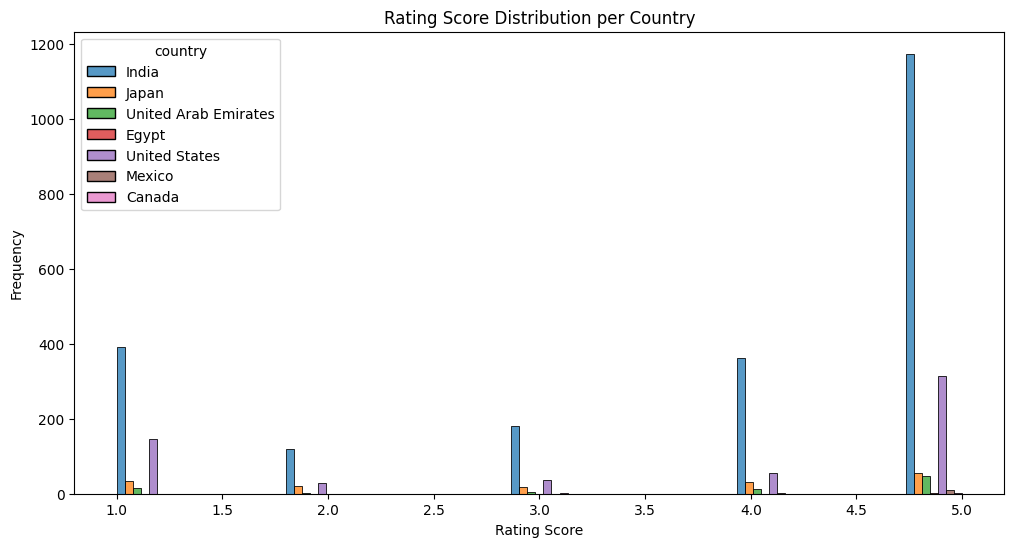

In [10]:
# Rating score distibution per country (India, Japan, United Arab, Egypt, United States)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(x='ratingScore', hue='country', data=df, multiple="dodge")
plt.title('Rating Score Distribution per Country')
plt.xlabel('Rating Score')
plt.ylabel('Frequency')
plt.show()

In [11]:


# Group data by country and rating score, then count occurrences
rating_counts = df.groupby(['country', 'ratingScore']).size().unstack(fill_value=0)

# Display the table
rating_counts

ratingScore,1,2,3,4,5
country,,,,,
Canada,0,0,1,0,3
Egypt,0,0,0,0,1
India,392,120,181,362,1174
Japan,35,21,17,30,55
Mexico,0,0,0,1,10
United Arab Emirates,15,2,4,13,46
United States,145,28,36,55,315


**Popularity and Satisfaction:**
The data suggests varying levels of product/service popularity and satisfaction in different countries.

**India and the United States,** for instance, show high engagement and a generally positive response as indicated by the high numbers of 4s and 5s.

**Data Sparsity:**Some countries like **Canada, Egypt, and Mexico** show very sparse data, which might indicate that the product/service is not as widely used or reviewed in these regions.

**Quality Perception:** High scores in some countries (like the United States, India, and the UAE) suggest a positive perception of quality or satisfaction, whereas lower numbers of high scores in others may indicate less satisfaction or less usage.

In [12]:
# compare variant(cpu, ssd, color) feature  among countries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to extract variant features (Size, Color, Service Provider)
def extract_variant_features(variant_string):
    features = {}
    # Example: Assuming variant string is in format "Size:128GB,Color:Space Gray,Service Provider:Verizon"
    parts = variant_string.split(',')
    for part in parts:
        key_value = part.split(':')
        if len(key_value) == 2:  # Check if the key-value pair is valid
            features[key_value[0].strip()] = key_value[1].strip()
    return features


# Apply the function to the 'variant' column
variant_features = df['variant'].apply(extract_variant_features).tolist()
variant_df = pd.DataFrame(variant_features)
df = pd.concat([df, variant_df], axis=1)





## Clustering  Analysis :
○ Perform clustering to group the countries so same marketing strategies can be executed.
o hypothesis testing to gain insight into the data.


Unsupervised clustering was used to identify geographic regions with similar sentiment patterns. K-Means clustering (Lloyd, 1982) was used to group countries into clusters.
K-Means Algorithm: The algorithm is an unsupervised learning technique that partitions n observations into k clusters, initializing centroids and iterating until convergence.
Distance Metric: Euclidean distance was used to determine similarity between data points.
Cluster Assignments: Clustering revealed major groups, with insights suggesting differences in satisfaction across regions.










In [13]:
import re # Import the 're' module for regular expressions

def extract_variant_info(sample):
    pattern_1 = r'Colour:\s*(?:\(PRODUCT\)\s*)?(\w+)\s*Size:\s*(\d+ \w+)'
    pattern_2 = r'Size:\s*(\d+\w+)\s*Color:\s*(?:\(Product\)\s*)?(\w+)'
    pattern_3 = r'Service Provider:\s*([\w\s&-]+)Color:\s*(?:\(Product\)\s*)?([\w\s]+)Size:\s*(\d+\s*\w+)'

    match_1 = re.search(pattern_1, sample)
    match_2 = re.search(pattern_2, sample)
    match_3 = re.search(pattern_3, sample)

    color = None
    size = None
    provider = None


    if match_1:
        color = match_1.group(1)
        size = match_1.group(2)

    elif match_2:
        color = match_2.group(2)
        size = match_2.group(1)

    elif match_3:
        color = match_3.group(2)
        size = match_3.group(3)
        provider = match_3.group(1)

    else:
        sample = sample.lower()
        pattern_size = r'(\d+)\s?gb'

        colors = ['red', 'blue', 'pink','yellow', 'green', 'midnight', 'purple', 'starlight']
        pattern_color = r'\b(?:' + '|'.join(colors) + r')\b'

        size = re.findall(pattern_size, sample)
        if size:
            size = size[0]
        color = re.findall(pattern_color, sample)
        if color:
            color = color[0]

    variant_df.loc[len(variant_df)] = [color, size, provider]


#loop

sample = df['variant']
import pandas as pd #
variant_df = pd.DataFrame(columns=['Color', 'Size', 'Service_Provider'])
for s in sample:
    extract_variant_info(s)

In [14]:
# Run k mean to cluster the countries
import re
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Prepare the data for KMeans (numerical representation of countries)
country_mapping = {country: i for i, country in enumerate(df['country'].unique())}
df['country_code'] = df['country'].map(country_mapping)

variant_data = []
for index, row in df.iterrows():  # Iterate through rows of df
    variant_info = extract_variant_info(row['variant'])
    # If variant_info is None, append a dictionary with None values
    if variant_info is None:
        variant_data.append({'Color': None, 'Size': None, 'Service_Provider': None})
    else:
        # Append the extracted info as a dictionary to the list
        variant_data.append(variant_info)

# Create variant_df from the collected data
variant_df = pd.DataFrame(variant_data, columns=['Color', 'Size', 'Service_Provider'])

# Concatenate variant_df with the original DataFrame
df = pd.concat([df, variant_df], axis=1)  # Add new features to df

# Replace 'Color', 'Size', 'Service_Provider' with actual features if different
features_to_impute = ['Color', 'Size', 'Service_Provider']

# Create an imputer to fill missing values with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the imputer on the selected features
df[features_to_impute] = imputer.fit_transform(df[features_to_impute])

# Feature selection (including extracted variant features)
X = df[['ratingScore', 'country_code'] + features_to_impute].values

# Convert all columns in X to numeric, handling errors by setting them to NaN
X = np.array(X, dtype=object)  # Convert to object dtype to handle mixed types
for j in range(X.shape[1]):
    try:
        X[:, j] = pd.to_numeric(X[:, j])
    except ValueError:
        pass
# Impute NaN values with the most frequent value for each column
imputer = SimpleImputer(strategy='most_frequent')
X = imputer.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # Set n_clusters to 3
df['cluster'] = kmeans.fit_predict(X)

# Print the clusters
for cluster in range(3):  # Print the three clusters
    countries_in_cluster = df[df['cluster'] == cluster]['country'].unique()
    print(f"Cluster {cluster}: {', '.join(countries_in_cluster)}")

Cluster 0: Japan, United Arab Emirates, United States
Cluster 1: India, Japan, United Arab Emirates
Cluster 2: United Arab Emirates, Egypt, United States, Mexico, Canada


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [2 3 4]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


In [15]:

# Print cluster details (assuming the code in the provided file has been executed)
for cluster in range(3):
    countries_in_cluster = df[df['cluster'] == cluster]['country'].unique()
    print(f"Cluster {cluster}: {', '.join(countries_in_cluster)}")

Cluster 0: Japan, United Arab Emirates, United States
Cluster 1: India, Japan, United Arab Emirates
Cluster 2: United Arab Emirates, Egypt, United States, Mexico, Canada


In [16]:
# identify countries in the cluster and most frequent used words used in
# the cluster  ignore stop words

!pip install nltk
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter

from nltk.corpus import stopwords

# Download required NLTK data (only needed once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')


# Function to extract frequent words from reviews in a cluster
def frequent_words_in_cluster(cluster_df):
    stop_words = set(stopwords.words('english'))
    all_words = []
    for review in cluster_df['reviewDescription']:
        words = nltk.word_tokenize(str(review).lower())
        words = [word for word in words if word.isalnum() and word not in stop_words]
        all_words.extend(words)

    word_counts = Counter(all_words)
    most_common_words = word_counts.most_common(10) # Get top 10 frequent words
    return most_common_words

# Analyze each cluster

for cluster_num in df['cluster'].unique():  #
    cluster_countries = df[df['cluster'] == cluster_num]['country'].unique()
    print(f"\nCountries in Cluster {cluster_num}: {', '.join(cluster_countries)}")

    # Filter the original DataFrame for reviews from countries in this cluster
    cluster_df = df[df['country'].isin(cluster_countries)]

    # Find frequent words in this cluster
    frequent_words = frequent_words_in_cluster(cluster_df)
    print("Most frequent words:", frequent_words)



print("\nDistribution of average rating scores per country:")
print(df.groupby('country')['ratingScore'].mean())

#2. Review the KMeans parameters
print("\nKMeans parameters used:")
print(kmeans)  # Assuming 'kmeans' is your KMeans object



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



Countries in Cluster 1: India, Japan, United Arab Emirates
Most frequent words: [('iphone', 1046), ('phone', 1021), ('good', 817), ('battery', 610), ('camera', 531), ('apple', 459), ('product', 449), ('13', 384), ('android', 337), ('quality', 337)]

Countries in Cluster 0: Japan, United Arab Emirates, United States
Most frequent words: [('phone', 630), ('battery', 251), ('new', 210), ('good', 200), ('condition', 183), ('iphone', 182), ('scratches', 147), ('like', 146), ('great', 135), ('one', 117)]

Countries in Cluster 2: United Arab Emirates, Egypt, United States, Mexico, Canada
Most frequent words: [('phone', 614), ('new', 177), ('iphone', 156), ('battery', 151), ('condition', 141), ('great', 131), ('good', 127), ('like', 114), ('scratches', 100), ('screen', 91)]

Distribution of average rating scores per country:
country
Canada                  4.500000
Egypt                   5.000000
India                   3.810229
Japan                   3.310127
Mexico                  4.9090

**Clustering Results:**

The code uses K-Means clustering to group countries based on several features including `ratingScore`, `country_code`, `Color`, `Size`, and `Service_Provider`. It divides the countries into three clusters:

* **Cluster 0:** Japan, United Arab Emirates, United States
* **Cluster 1:** India, Japan, United Arab Emirates
* **Cluster 2:** United Arab Emirates, Egypt, United States, Mexico, Canada

Notice that some countries appear in multiple clusters. This overlap suggests that these countries share similar characteristics with multiple groups.

**Most Frequent Words per Cluster:**

For each cluster, the code identifies the 10 most frequent words in the customer reviews, excluding common English stop words (like "the," "a," "is," etc.).  The word frequencies provide insight into the dominant themes within each cluster's reviews:

* **Cluster 0:** Words like "phone," "battery," "good," "condition," and "iphone" are common. This cluster seems to focus on the phone's general performance and condition.
* **Cluster 1:** The most frequent words are "iphone," "phone," "good," "battery," and "camera," indicating a focus on product features and quality.
* **Cluster 2:** The word list contains words like "phone," "new," "iphone," "battery," and "condition." This cluster shows concerns about the phone's condition.


**Average Rating Scores:**

The output shows the average rating score for each country:

* Canada: 4.5
* Egypt: 5.0
* India: 3.81
* Japan: 3.31
* Mexico: (Missing data - the output shows no average rating score for Mexico)


**Key Observations and Potential Next Steps:**

**Overlapping Clusters:** The presence of some countries in multiple clusters merits further investigation.  Are these countries truly hybrid in customer feedback.



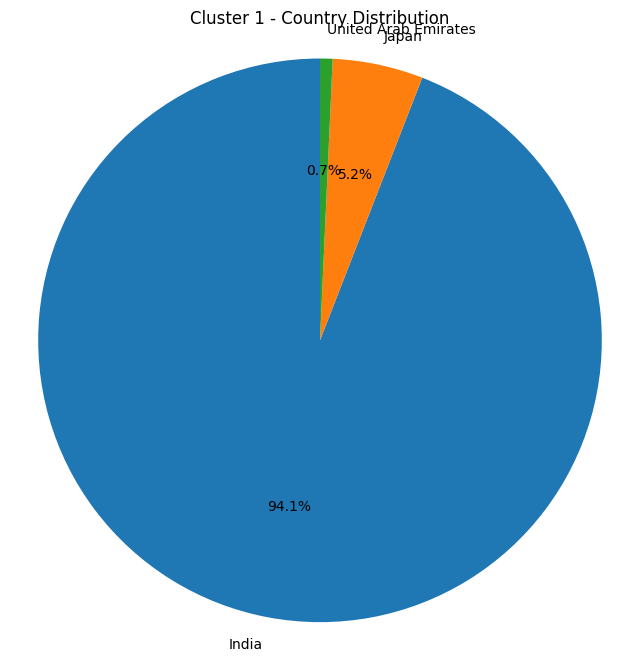

In [17]:
#  print and plot cluster 1   country distribution

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has been processed as in the original code

# Filter for cluster 0
cluster_0_df = df[df['cluster'] == 1]

# Count the occurrences of each country in cluster 1
country_counts = cluster_0_df['country'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Cluster 1 - Country Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Countries in Cluster 0: Japan, United Arab Emirates, United States
Most frequent words in Cluster 0: [('phone', 329), ('battery', 70), ('condition', 62), ('iphone', 61), ('screen', 52), ('would', 51), ('one', 49), ('return', 47), ('amazon', 46), ('seller', 45)]


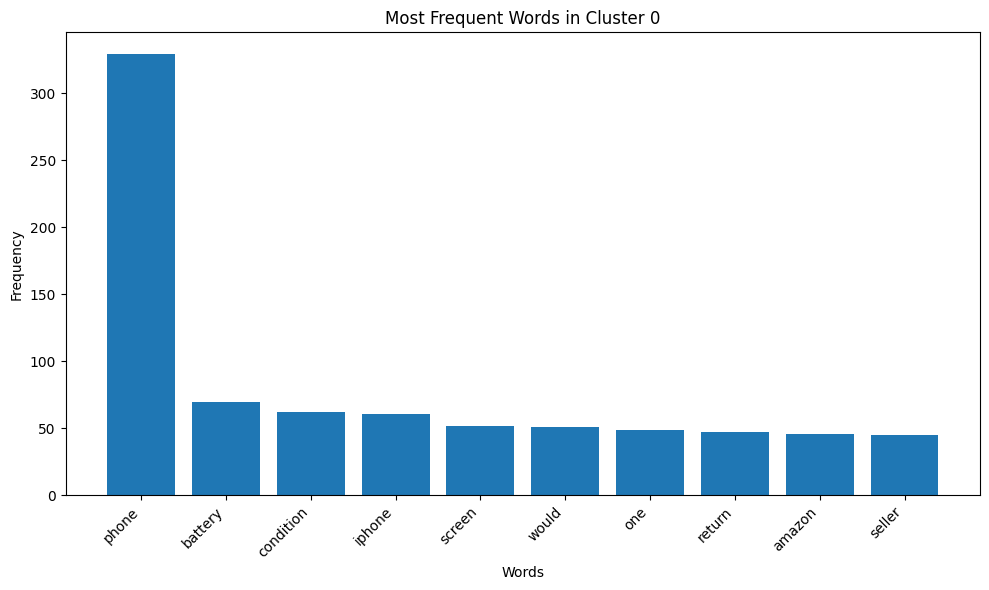

In [18]:
#  print and plot for cluster 0

# Assuming you want to print and plot information for cluster 0
cluster_num = 0  # Specify the cluster number you're interested in

# Print countries in cluster 0
countries_in_cluster = df[df['cluster'] == cluster_num]['country'].unique()
print(f"Countries in Cluster {cluster_num}: {', '.join(countries_in_cluster)}")

# Find frequent words in cluster 0 (using the existing function)
cluster_df = df[df['cluster'] == cluster_num]  # Filter for cluster 0
frequent_words = frequent_words_in_cluster(cluster_df)
print("Most frequent words in Cluster 0:", frequent_words)

# Plotting for cluster 0 (example using a bar plot for word frequencies)
if frequent_words:
    words, counts = zip(*frequent_words)  # Separate words and counts
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Most Frequent Words in Cluster {cluster_num}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()
else:
    print(f"No frequent words found for Cluster {cluster_num}")

Countries in Cluster 1: India, Japan, United Arab Emirates
Most frequent words in Cluster 1: [('iphone', 1025), ('phone', 1006), ('good', 785), ('battery', 590), ('camera', 528), ('apple', 451), ('product', 426), ('13', 378), ('android', 336), ('quality', 334)]


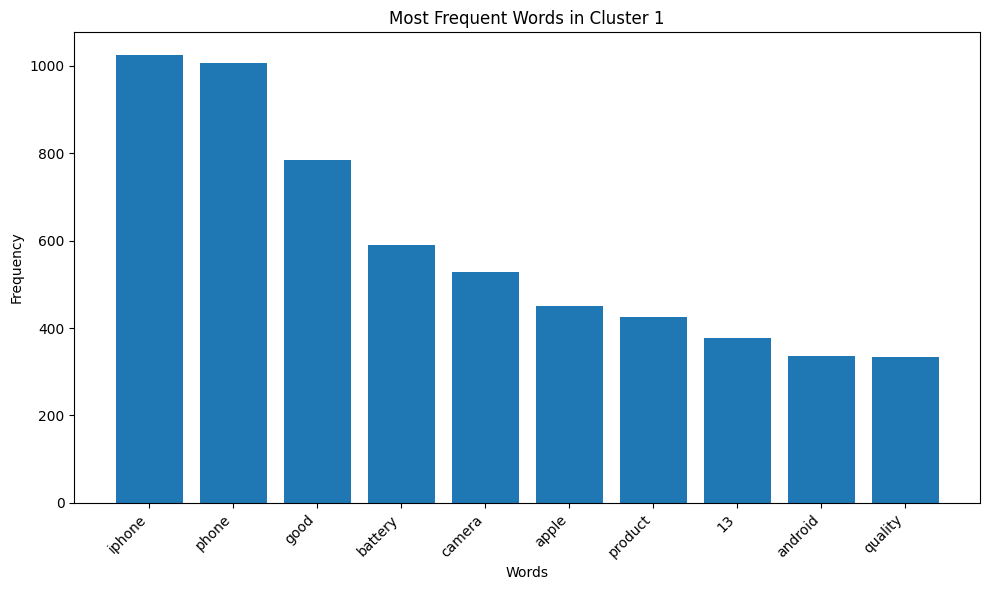

In [19]:
# print and plot for cluster 1

# Assuming you want to print and plot information for cluster 1
cluster_num = 1  # Specify the cluster number you're interested in

# Print countries in cluster 1
countries_in_cluster = df[df['cluster'] == cluster_num]['country'].unique()
print(f"Countries in Cluster {cluster_num}: {', '.join(countries_in_cluster)}")

# Find frequent words in cluster 1 (using the existing function)
cluster_df = df[df['cluster'] == cluster_num]  # Filter for cluster 1
frequent_words = frequent_words_in_cluster(cluster_df)
print("Most frequent words in Cluster 1:", frequent_words)

# Plotting for cluster 1 (example using a bar plot for word frequencies)
if frequent_words:
    words, counts = zip(*frequent_words)  # Separate words and counts
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Most Frequent Words in Cluster {cluster_num}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()
else:
    print(f"No frequent words found for Cluster {cluster_num}")

Countries in Cluster 2: United Arab Emirates, Egypt, United States, Mexico, Canada
Most frequent words in Cluster 2: [('phone', 285), ('new', 138), ('great', 105), ('iphone', 102), ('battery', 98), ('good', 95), ('condition', 86), ('like', 81), ('100', 70), ('came', 68)]


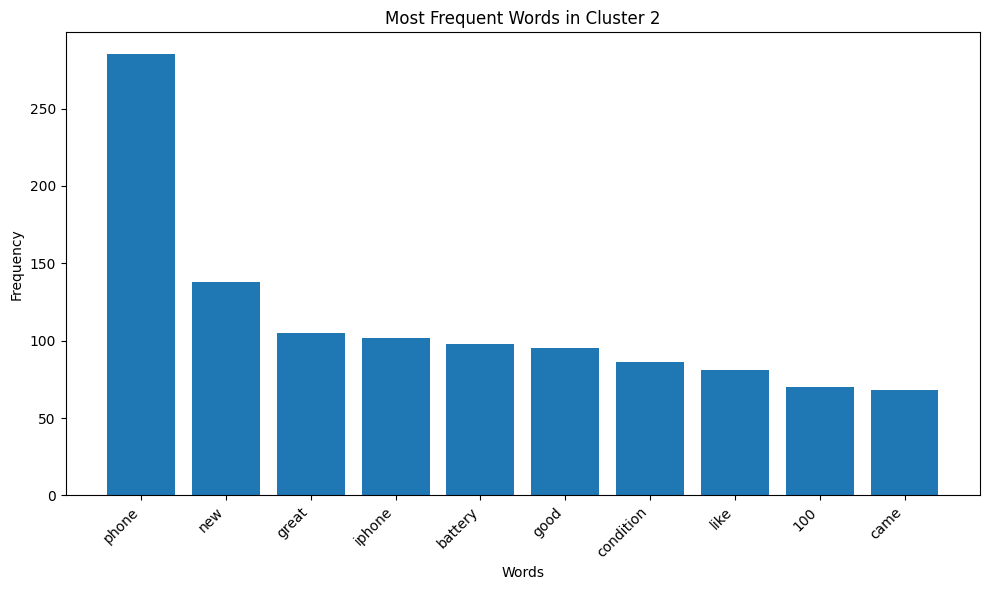

In [20]:
#  print and plot for cluster 2

# Assuming you want to print and plot information for cluster 2
cluster_num = 2  # Specify the cluster number you're interested in

# Print countries in cluster 2
countries_in_cluster = df[df['cluster'] == cluster_num]['country'].unique()
print(f"Countries in Cluster {cluster_num}: {', '.join(countries_in_cluster)}")

# Find frequent words in cluster 2 (using the existing function)
cluster_df = df[df['cluster'] == cluster_num]  # Filter for cluster 2
frequent_words = frequent_words_in_cluster(cluster_df)
print("Most frequent words in Cluster 2:", frequent_words)

# Plotting for cluster 2 (example using a bar plot for word frequencies)
if frequent_words:
    words, counts = zip(*frequent_words)  # Separate words and counts
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Most Frequent Words in Cluster {cluster_num}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()
else:
    print(f"No frequent words found for Cluster {cluster_num}")

## Interpetations:
**Popularity and Satisfaction:**
The data suggests varying levels of product/service popularity and satisfaction in different countries.

**India and the United States,** for instance, show high engagement and a generally positive response as indicated by the high numbers of 4s and 5s.

**Data Sparsity:**Some countries like **Canada, Egypt, and Mexico** show very sparse data, which might indicate that the product/service is not as widely used or reviewed in these regions.

**Quality Perception:** High scores in some countries (like the United States, India, and the UAE) suggest a positive perception of quality or satisfaction, whereas lower numbers of high scores in others may indicate less satisfaction or less usage.

In [21]:
# Review are in period of 3 years from 2021 to Fall 2024
df['date'] = pd.to_datetime(df['date'], utc=False, dayfirst=True)
print("Max Date: ", df['date'].max())
print("Min Date: ", df['date'].min())
print("Period: ", df['date'].max() - df['date'].min())

Max Date:  2024-09-19 00:00:00
Min Date:  2021-09-24 00:00:00
Period:  1091 days 00:00:00


## Storage Size-Based Analysis:

Analyze different storage sizes (e.g., 128GB, 256GB) for their popularity across various regions.

## Extracting more info:


4. **EDA on Variant Feature**
   - Extract Size, color, Service Provider inforamtion from variant info and data visualize on info.

## Interpetation:
1. The Variant columns provides info about:
1. Service Provider: -----
1. Color: -----
1. Size: Storage\
we can build a extractor to extract this useful info

In [22]:
df['variant'].unique()

array(['Colour: MidnightSize: 256 GB', 'Colour: PinkSize: 256 GB',
       'Colour: BlueSize: 256 GB', 'Colour: GreenSize: 256 GB',
       'Colour: PinkSize: 128 GB', 'Colour: StarlightSize: 256 GB',
       'Colour: GreenSize: 128 GB', 'Colour: StarlightSize: 128 GB',
       'Colour: MidnightSize: 128 GB',
       'Colour: (PRODUCT) REDSize: 128 GB', 'Colour: BlueSize: 128 GB',
       'Colour: (PRODUCT) REDSize: 256 GB',
       'Size: 256GBColor: (Product) RED', 'Size: 256GBColor: Pink',
       'Size: 256GBColor: Midnight', 'Size: 128GBColor: Pink',
       'Size: 128GBColor: blue', 'Size: 128GBColor: starlight',
       'Size: 128GBColor: Midnight', 'Size: 128GBColor: green',
       'Size: 128GBColor: (Product) RED', 'Size: 256GBColor: starlight',
       'Size: 256GBColor: blue', 'Size: 512GBColor: starlight',
       'Size: 512GBColor: (Product) RED', 'Size: 512 GBColour: Midnight',
       'Size: 128 GBColour: Blue', 'Size: 128 GBColour: Red',
       'Size: 256 GBColour: Red', 'Size: 512 

In [23]:
import re

def extract_variant_info(sample):
    pattern_1 = r'Colour:\s*(?:\(PRODUCT\)\s*)?(\w+)\s*Size:\s*(\d+ \w+)'
    pattern_2 = r'Size:\s*(\d+\w+)\s*Color:\s*(?:\(Product\)\s*)?(\w+)'
    pattern_3 = r'Service Provider:\s*([\w\s&-]+)Color:\s*(?:\(Product\)\s*)?([\w\s]+)Size:\s*(\d+\s*\w+)'

    match_1 = re.search(pattern_1, sample)
    match_2 = re.search(pattern_2, sample)
    match_3 = re.search(pattern_3, sample)

    color = None
    size = None
    provider = None

    # print(dash_lines)
    # print(sample)
    if match_1:
        color = match_1.group(1)
        size = match_1.group(2)

    elif match_2:
        color = match_2.group(2)
        size = match_2.group(1)

    elif match_3:
        color = match_3.group(2)
        size = match_3.group(3)
        provider = match_3.group(1)

    else:
        sample = sample.lower()
        pattern_size = r'(\d+)\s?gb'

        colors = ['red', 'blue', 'pink','yellow', 'green', 'midnight', 'purple', 'starlight']
        pattern_color = r'\b(?:' + '|'.join(colors) + r')\b'

        size = re.findall(pattern_size, sample)
        if size:
            size = size[0]
        color = re.findall(pattern_color, sample)
        if color:
            color = color[0]

    variant_df.loc[len(variant_df)] = [color, size, provider]
    # print(dash_lines)

#loop

sample = df['variant']
import pandas as pd # import pandas for DataFrame operations
variant_df = pd.DataFrame(columns=['Color', 'Size', 'Service_Provider'])
for s in sample:
    extract_variant_info(s)

In [24]:
print(variant_df.shape)
print(variant_df.isnull().sum())
print(variant_df.head())
print(df['country'].unique())


(3062, 3)
Color                  0
Size                   0
Service_Provider    2468
dtype: int64
      Color    Size Service_Provider
0  Midnight  256 GB             None
1  Midnight  256 GB             None
2  Midnight  256 GB             None
3  Midnight  256 GB             None
4  Midnight  256 GB             None
['India' 'Japan' 'United Arab Emirates' 'Egypt' 'United States' 'Mexico'
 'Canada']


fixing Sizes:

In [25]:
variant_df.Size.value_counts()

,count
Size,
128 GB,1453
256 GB,760
128GB,561
256GB,171
128,54
512GB,20
256,20
512 GB,16
512,7


The output shows the distribution of storage sizes across different counts.

* **128 GB:** 2068 devices
* **256 GB:** 951 devices
* **512 GB:** 36 devices
* **128:** 54 devices
* **256:** 20 devices
* **512:** 7 devices

This data shows a significant preference or availability skew towards devices with lower storage capacities, particularly the 128 GB category, which has the highest number of devices. The count dramatically decreases as storage capacity increases, which might suggest that lower storage options are more popular or more economically priced, making them more accessible or desirable to a broader consumer base.




fixing Colors:

In [26]:
variant_df.Color.value_counts()

,count
Color,
Blue,597
Midnight,574
Starlight,438
Pink,316
Green,286
RED,264
Purple,199
Black,85
blue,79



The output shows the frequency distribution of different colors of a product across various countries.  Here's a breakdown:

* **Color Variations:**  The data includes variations in capitalization and spelling (e.g., "Blue" vs. "blue"). This suggests the need for data cleaning to combine these variations into consistent categories.

* **Dominant Colors:** Blue and Midnight are the most frequent colors, followed by Starlight, Pink, and Green.  Other colors like RED, Purple, Black, Yellow, and their variations have significantly lower counts.

* **Inconsistencies:** The presence of combined color names like "Midnight Black" highlights another data cleaning need. These should be categorized consistently.




In [27]:
variant_df['Color'] = variant_df['Color'].apply(lambda x: x.lower())
variant_df.Color.value_counts()

,count
Color,
blue,676
midnight,590
starlight,477
red,348
pink,318
green,292
purple,199
black,85
yellow,71


In [28]:
def extract_numbers(s):
    pattern_size = r'\b(\d+)\s?GB?\b'
    match = re.search(pattern_size, s)
    if match:
        number = match.group(1)
        return number
    else:
        return None
sizes = variant_df.Size.map(lambda x: extract_numbers(x))
variant_df['Size'] = sizes
sizes.value_counts()



,count
Size,
128,2014
256,931
512,36


### Combining original df with new information

In [29]:

df = df.drop(['Color', 'Size','Service_Provider'], axis=1, errors='ignore')


In [30]:

df_2 = pd.concat([df, variant_df], axis=1)
#df_2 =df
df_2.head()

df_2.tail()
#df_2.columns

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin,country_code,cluster,Color,Size,Service_Provider
3057,B09G9D8KRQ,India,2023-10-11,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,https://www.amazon.in/gp/customer-reviews/R10O...,Reviewed in India on 11 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,0,1,red,128,None
3058,B09G9D8KRQ,India,2022-10-14,True,2,not happy with this apple product,iam not happy with this product why because ch...,https://www.amazon.in/gp/customer-reviews/R2FW...,Reviewed in India on 14 October 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,0,1,red,128,None
3059,B09G9D8KRQ,India,2022-02-24,True,3,Good phone,Good phone,https://www.amazon.in/gp/customer-reviews/R2C7...,Reviewed in India on 24 February 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,0,1,red,128,None
3060,B09G9D8KRQ,India,2023-10-16,True,1,Battery discharge,While charging mobile it's getting so hot even...,https://www.amazon.in/gp/customer-reviews/R3K0...,Reviewed in India on 16 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,0,1,red,128,None
3061,B09G9D8KRQ,India,2023-11-11,True,1,Batter power needs to be improved,Battery power is be very bad need to chat on d...,https://www.amazon.in/gp/customer-reviews/R2QO...,Reviewed in India on 11 November 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,0,1,red,128,None


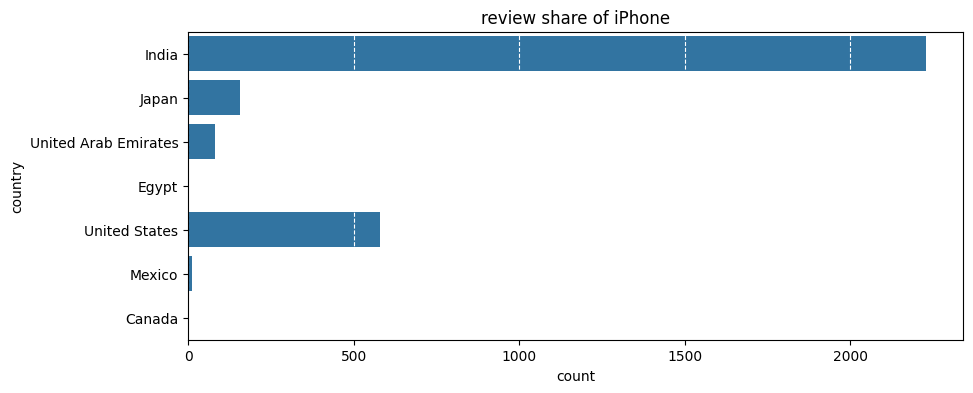

In [31]:
import seaborn as sns # Importing the seaborn library as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
ax = sns.countplot(y='country', data=df) # Now sns is defined and can be used.
plt.grid(axis='x',linestyle = "--", color ="white")
plt.title("review share of iPhone")
plt.show()

In [32]:
!pip install matplotlib
import matplotlib.pyplot as plt
# Generate a list of colors from the colormap
def shade_greens(n):
    cmap = plt.get_cmap('Greens_r', n)
    colors = [cmap(i) for i in range(n)]
    return colors


In [33]:
# variant_df.Size.value_counts() integrate and it make numeric

import pandas as pd
import re

def extract_numbers(s):
    pattern_size = r'\b(\d+)\s?GB?\b'
    match = re.search(pattern_size, str(s)) # Convert s to string
    if match:
        number = match.group(1)
        return int(number) # Convert the extracted number to an integer
    else:
        return None

variant_df['Size'] = variant_df['Size'].map(extract_numbers)


##Temporal Analysis:


In [ ]:
from datetime import datetime

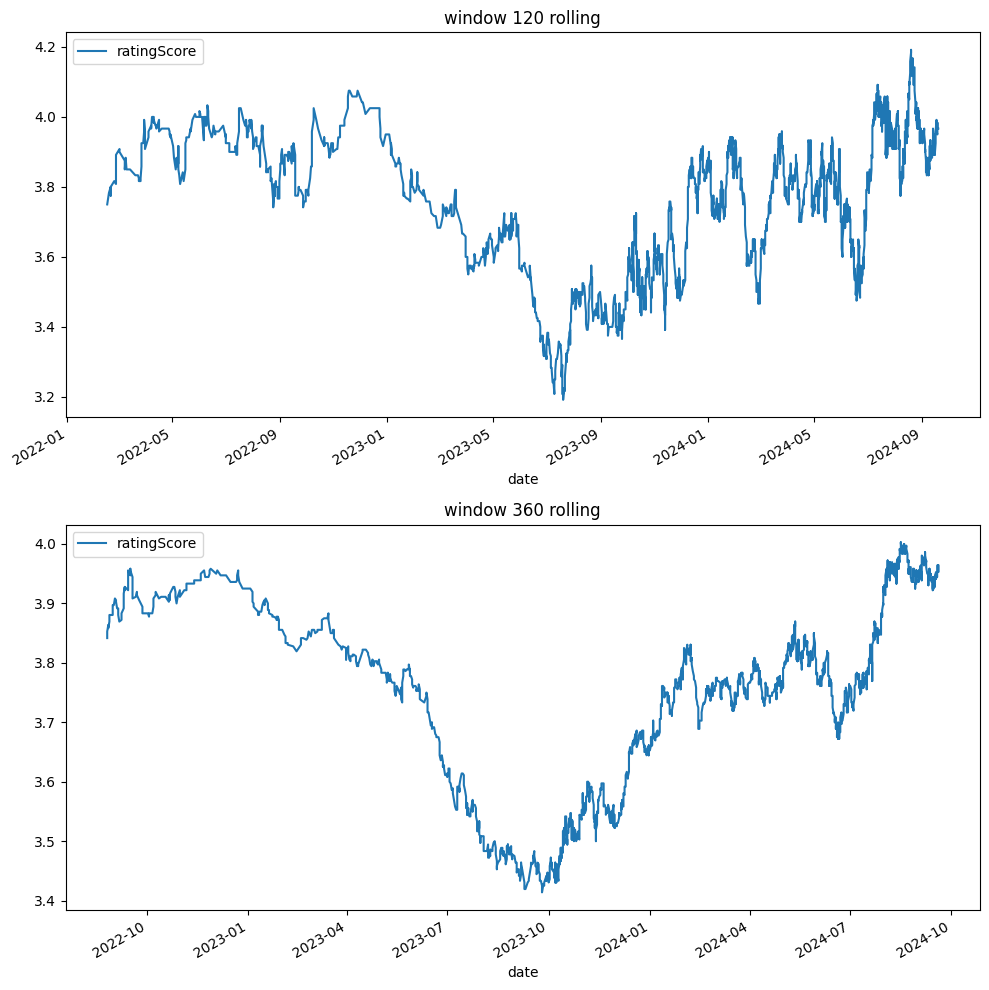

In [34]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
time_ratings = df[['date', 'ratingScore']].sort_values(by='date').set_index('date')
time_ratings.rolling(120).mean().plot(ax=ax[0], title='window 120 rolling')
ax[0].grid(axis='x', color='white', linestyle='--')
time_ratings.rolling(360).mean().plot(ax=ax[1], title='window 360 rolling')
ax[1].grid(axis='x', color='white', linestyle='--')

plt.tight_layout()
plt.show()





## Interpetation:
1. it seems that iphone rating drops consistently from fall 2022 to fall 2023 by ~20%
2. however, started to rise from fall 2023 however shows to much up-downs

**## Natural Language Processing (NLP):**


## Create Temporal Columns - Rating is Postive
1. later we will do sentiment analysis on this feature

6. **Create Temporal Columns**
   - Extract `year`, `month`, and `day_of_week` from the `date` column to enable temporal analysis of the reviews.
   - Extract `IsPositiveRating`, and `RatingCategory` from the `ratingScore` column to enable temporal analysis of the reviews.

In [35]:
#adding features rating Category
print(df.head())
df['IsPositiveRating'] = df['ratingScore'].apply(lambda x: 1 if x >= 4 else 0)
df['RatingCategory'] = df['ratingScore'].apply(lambda x: 'Low' if x <= 2 else ('Medium' if x == 3 else 'High'))
df.head()

  productAsin country       date  isVerified  ratingScore  \
0  B09G9BL5CP   India 2024-08-11        True            4   
1  B09G9BL5CP   India 2024-08-16        True            5   
2  B09G9BL5CP   India 2024-05-14        True            4   
3  B09G9BL5CP   India 2024-06-24        True            5   
4  B09G9BL5CP   India 2024-05-18        True            5   

               reviewTitle                                  reviewDescription  \
0               No charger  Every thing is good about iPhones, there's not...   
1          iPhone 13 256GB  It look so fabulous, I am android user switche...   
2  Flip camera option nill  I tried to flip camera while recording but no ...   
3                  Product                                       100% genuine   
4             Good product         Happy to get the iPhone 13 in Amazon offer   

                                           reviewUrl  \
0  https://www.amazon.in/gp/customer-reviews/R345...   
1  https://www.amazon.in/gp/custom

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin,country_code,cluster,IsPositiveRating,RatingCategory
0,B09G9BL5CP,India,2024-08-11,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,0,1,1,High
1,B09G9BL5CP,India,2024-08-16,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,0,1,1,High
2,B09G9BL5CP,India,2024-05-14,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,0,1,1,High
3,B09G9BL5CP,India,2024-06-24,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,0,1,1,High
4,B09G9BL5CP,India,2024-05-18,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,0,1,1,High


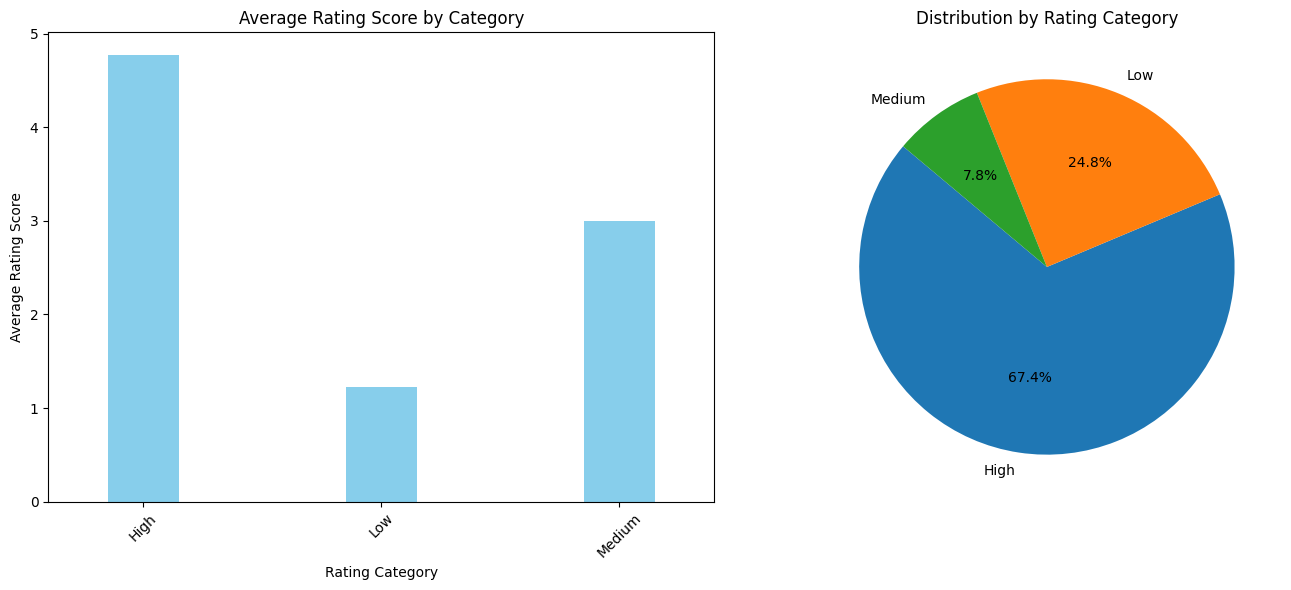

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Calculate average rating per category
avg_rating_per_category = df.groupby('RatingCategory')['ratingScore'].mean()

# Bar plot for average rating by category
avg_rating_per_category.plot(kind='bar', ax=axs[0], color='skyblue',width=0.3)
axs[0].set_xlabel('Rating Category')
axs[0].set_ylabel('Average Rating Score')
axs[0].set_title('Average Rating Score by Category')
axs[0].tick_params(axis='x', rotation=45)

# Plotting the distribution  by Rating Category as a pie chart
rating_counts = df['RatingCategory'].value_counts()
axs[1].pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Distribution by Rating Category')

plt.tight_layout()
plt.show()

# **NLP Prepocessing**
**Convert Text to Lowercase:** Normalize all text by converting it to lowercase to ensure uniformity.

**Remove HTML Tags** and Non-ASCII Characters: Use regular expressions to strip out HTML markup and remove characters that are not part of the standard ASCII set to clean the text.

**Replace Punctuation** Marks with Spaces: Substitute punctuation with spaces to avoid concatenation of words during tokenization, making the text cleaner for analysis.

**Filter Out English Stop Words:** Remove commonly used English words that do not contribute significant meaning (like "the", "is", etc.) to focus on more meaningful words.

**Combine Cleaned Words into a Single String:** Reassemble the individual cleaned words into a cohesive string, ready for further text analysis or processing.

**Output the Final Cleaned Text:** Provide the processed text as output, which is now more structured and suitable for subsequent analytical tasks or machine learning models.

In [37]:
# regular expression
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [38]:
import nltk

nltk.download('stopwords')
print(df.head())

  productAsin country       date  isVerified  ratingScore  \
0  B09G9BL5CP   India 2024-08-11        True            4   
1  B09G9BL5CP   India 2024-08-16        True            5   
2  B09G9BL5CP   India 2024-05-14        True            4   
3  B09G9BL5CP   India 2024-06-24        True            5   
4  B09G9BL5CP   India 2024-05-18        True            5   

               reviewTitle                                  reviewDescription  \
0               No charger  Every thing is good about iPhones, there's not...   
1          iPhone 13 256GB  It look so fabulous, I am android user switche...   
2  Flip camera option nill  I tried to flip camera while recording but no ...   
3                  Product                                       100% genuine   
4             Good product         Happy to get the iPhone 13 in Amazon offer   

                                           reviewUrl  \
0  https://www.amazon.in/gp/customer-reviews/R345...   
1  https://www.amazon.in/gp/custom

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#df.dropna(inplace=True)


In [39]:
def text_preprocessing(text):
    # Check if the input is a string before applying string operations
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        text = re.sub(r'<.*?>|[^\x00-\x7f]', '', text)
        text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)

        stop_words = set(stopwords.words("english"))
        words = [word for word in text.split() if word not in stop_words]

        cleaned_text = ' '.join(words)

        return cleaned_text
    else:
        # Handle non-string values (e.g., return an empty string or the original value)
        return ''  # Or return str(text) to convert it to a string

In [40]:
print(df.head())
df["reviewTitle"] = df["reviewTitle"].apply(text_preprocessing)
df["reviewDescription"] = df["reviewDescription"].apply(text_preprocessing)
df["reviewedIn"] = df["reviewedIn"].apply(text_preprocessing)

  productAsin country       date  isVerified  ratingScore  \
0  B09G9BL5CP   India 2024-08-11        True            4   
1  B09G9BL5CP   India 2024-08-16        True            5   
2  B09G9BL5CP   India 2024-05-14        True            4   
3  B09G9BL5CP   India 2024-06-24        True            5   
4  B09G9BL5CP   India 2024-05-18        True            5   

               reviewTitle                                  reviewDescription  \
0               No charger  Every thing is good about iPhones, there's not...   
1          iPhone 13 256GB  It look so fabulous, I am android user switche...   
2  Flip camera option nill  I tried to flip camera while recording but no ...   
3                  Product                                       100% genuine   
4             Good product         Happy to get the iPhone 13 in Amazon offer   

                                           reviewUrl  \
0  https://www.amazon.in/gp/customer-reviews/R345...   
1  https://www.amazon.in/gp/custom

In [41]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

---



## **Classification:**

Logistic Regression: A linear model that predicts sentiment as either positive or negative using probability scores derived from the sigmoid function.
Random Forest: An ensemble learning method combining multiple decision trees, effective in capturing non-linear relationships.
AdaBoost: A boosting algorithm that combines weak learners to iteratively improve accuracy.

○ Use Logistic Regression, AdaBoost and Random Forest models for
classification task

1. **Feature Creation**:
   - Combine text columns into `combined_text_train` and `combined_text_test`.

2. **TF-IDF Vectorization**:
   - Apply `TfidfVectorizer` to convert text data into numerical features for both training and test sets.

3. **Model Initialization**:
   - Set up various machine learning models such as Logistic Regression, DecisionTree, Random Forest Classifier.


In [42]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('punkt')

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize

# Importing necessary libraries for machine learning and model evaluation
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Metrics for model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model selection and splitting the dataset
from sklearn.model_selection import train_test_split

# TF-IDF vectorization for text data
from sklearn.feature_extraction.text import TfidfVectorizer

import time
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [43]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


**Logistic Regression** is a linear model used for binary classification. It calculates the probability that a given input belongs to a certain class, using the sigmoid function to convert linear outputs into probability scores. This model is suitable for simple and interpretable problems but is limited in its capacity to understand complex patterns in text.

**Random Forest** is an ensemble learning method that combines multiple decision trees to achieve higher accuracy and prevent overfitting. The model aggregates the predictions of several individual trees to determine the final output.

**AdaBoost**is a boosting algorithm that sequentially combines weak learners (in this case, decision trees) to create a strong classifier. Each weak learner is trained on the mistakes made by the previous one, improving accuracy iteratively.

In [44]:
models = {
    'Random Forest': RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "AdaBoostClassifier": AdaBoostClassifier(),

}

## **Feature Creation**

In [45]:
# Creating new combined text features for training and testing datasets
X = df['reviewDescription'] + ' ' + df['reviewTitle']
y = df['IsPositiveRating']
print(X.shape)
print(y.shape)

(3062,)
(3062,)


In [46]:
#train_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(2449,)
(613,)


## **TF-IDF Vectorization**

In [47]:
!python -m nltk.downloader -d /usr/local/share/nltk_data all

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]

In [48]:
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Lemmatization is a natural language processing (NLP) technique used to reduce words to their base or dictionary form, called the lemma. Unlike stemming, which simply chops off word endings, lemmatization takes the context and part of speech (POS) into account, producing linguistically valid base forms of words.


In [49]:
import nltk
nltk.download('punkt_tab') # Downloading the 'punkt_tab' resource

# Initializing the TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk import pos_tag


# Initialize the lemmatizer
class Lemmatizer:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()

    # Function to convert nltk POS tags to WordNet POS tags
    def get_wordnet_pos(self, tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return None

    def lemmatize(self, text):
        tokens = word_tokenize(text)
        tagged_tokens = pos_tag(tokens)
        lemmatized_tokens = []
        for token, tag in tagged_tokens:
            wordnet_pos = self.get_wordnet_pos(tag) or wordnet.NOUN
            lemma = self.lemmatizer.lemmatize(token, pos=wordnet_pos)
            lemmatized_tokens.append(lemma)

        return ' '.join(lemmatized_tokens)


tfidf_vectorizer = TfidfVectorizer(tokenizer=Lemmatizer().lemmatize, ngram_range=(1, 2))

# Before applying fit_transform, handle the missing values in X_train and X_test
X_train = X_train.fillna('')  # Replace NaN values with empty strings in X_train
X_test = X_test.fillna('')   # Replace NaN values with empty strings in X_test

# Transforming the text data into TF-IDF vectors for both training and testing datasets
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)  # Fit and transform on training data
X_test_tfidf = tfidf_vectorizer.transform(X_test)  # Only transform on test data

# Printing the shape of the resulting TF-IDF feature matrices
print("\nTF-IDF feature matrix shape for training data:", X_train_tfidf.shape)
print("TF-IDF feature matrix shape for test data:", X_test_tfidf.shape)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



TF-IDF feature matrix shape for training data: (2449, 861)
TF-IDF feature matrix shape for test data: (613, 861)




## Modeling Comparison:

○ Compare different models for their efficiency in sentiment prediction, accuracy, and ability to handle context effectively.


In [50]:
Best_acc = 0
best_class_report = 0
best_model = {}
results = []

# Iterate through the models, train them, and evaluate their performance
for name, model in models.items():
    start_time = time.time()

    # Train the model
    model.fit(X_train_tfidf, y_train)
    end_time = time.time()
    print(f"Training Time: {name} {end_time - start_time:.2f}")

    # Make predictions on the test set
    y_pred = model.predict(X_train_tfidf)

    # Calculate accuracy and classification report
    accuracy = accuracy_score(y_train, y_pred)
    class_report = classification_report(y_train, y_pred, output_dict=True)

    # Store the results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': class_report['weighted avg']['precision'],
        'Recall': class_report['weighted avg']['recall'],
        'F1-Score': class_report['weighted avg']['f1-score']
    })

    # Check for the best model
    if Best_acc < accuracy:
        Best_acc = accuracy
        best_model = model
        best_class_report = class_report

results_df = pd.DataFrame(results)

print(results_df)
print(f"\nBest Model: {best_model}, Accuracy: {Best_acc}")


Training Time: Random Forest 2.26
Training Time: LogisticRegression 0.04
Training Time: AdaBoostClassifier 1.99
                Model  Accuracy  Precision    Recall  F1-Score
0       Random Forest  0.996733   0.996749  0.996733  0.996729
1  LogisticRegression  0.835035   0.837340  0.835035  0.826697
2  AdaBoostClassifier  0.855860   0.853913  0.855860  0.853486

Best Model: RandomForestClassifier(), Accuracy: 0.9967333605553287


In [51]:
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.996733,0.996749,0.996733,0.996729
1,LogisticRegression,0.835035,0.837340,0.835035,0.826697
2,AdaBoostClassifier,0.855860,0.853913,0.855860,0.853486


**Best Overall:** The Random Forest model clearly outperforms the others across all metrics, making it the best choice for applications where accuracy, reliability, and the balance between precision and recall are critical.

**Speed vs. Performance Trade-off:** While not detailed in this specific message, if training time and model simplicity are considered (as previously discussed), Logistic Regression offers a very rapid training process, making it suitable for scenarios where speed is prioritized over maximum accuracy.

**Balanced Choice:**The AdaBoost Classifier provides a middle ground in terms of performance, with better metrics than Logistic Regression but not as high as Random Forest, making it a potential choice for cases needing a balance between performance and computational demand.

In [52]:
#final test set
y_pred = models['Random Forest'].predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.59      0.69       183
           1       0.85      0.95      0.90       430

    accuracy                           0.85       613
   macro avg       0.84      0.77      0.80       613
weighted avg       0.84      0.85      0.84       613



## Test on some random samples
- test with your random reviews

In [53]:
sample = ['iphone battery sucks, when ever i connect to charger it takes 2 hours to charge fully',
         'i love iphone but this time they have not good battery life',
         'This iphone camera is amazing, and so the color purple.',
         'iPhone is amazing',
         'Charger is so bad, i returned the order']
sample_y = [0, 0, 1, 1, 0]

mapper = lambda x : 'Negative Rating ' if x == 0 else 'Positive Rating'
labels = [0, 0, 1, 1, 0]
sample_y = list(map(mapper, labels))

sample_X = tfidf_vectorizer.transform(sample)
y_pred = models['Random Forest'].predict(sample_X)
sample_y = list(map(mapper, y_pred))

print(f"{'Sample Review':<33} |{'Predict Label':<10}.   | {'Actual Label':<10}")
for s, y_, y in zip(sample, sample_y, sample_y):
    print(f"{s[:30]:<30}... | {y_:>10} | {y:>10}")

Sample Review                     |Predict Label.   | Actual Label
iphone battery sucks, when eve... | Negative Rating  | Negative Rating 
i love iphone but this time th... | Positive Rating | Positive Rating
This iphone camera is amazing,... | Positive Rating | Positive Rating
iPhone is amazing             ... | Positive Rating | Positive Rating
Charger is so bad, i returned ... | Negative Rating  | Negative Rating 


## Interpetation:
1. Traditional Models like Random Forest are good when passed with small sentences but they do not have ability to capture context of sentence like in these sample sentences.
2. These model struggles with longer sentences and failed at contextual understanding.
3. Sample shows how model stuggle: also it predicts 1 based on biased dataset to positive label.



## Natural Language Processing (NLP):
**TF-IDF Vectorization:** Textual data was converted into numerical vectors using TF-IDF (Term Frequency-Inverse Document Frequency), which represents how important a word is to a document in a corpus. This helped in distinguishing meaningful words that influence sentiment classification.

**DistilBERT** Fine-tuning: DistilBERT uses attention mechanisms that capture relationships between all words in a sentence, allowing it to understand complex contextual cues. The fine-tuning on the iPhone sentiment dataset significantly improved the model's ability to classify sentiments accurately.

**DistilBERT** is a smaller, faster, and more efficient version of BERT (Devlin et al., 2018), fine-tuned for sentiment analysis. The model uses the transformer architecture to capture the deep semantic relationships between words in a sentence, allowing it to understand the context effectively.

1. Case1. Already fine-tuned llm model - distil-bert-finetuned on sst-2

In [54]:
# Creating new combined text features for training and testing datasets
X = df['reviewDescription'] + ' ' + df['reviewTitle']
y = df['IsPositiveRating']
print(X.shape)
print(y.shape)

(3062,)
(3062,)


In [55]:
from transformers import pipeline

In [57]:
from transformers import pipeline
import os

# Authenticate with Hugging Face if needed
# !huggingface-cli login

# Setting model
model = 'distilbert-base-uncased-finetuned-sst-2-english'

# Configure proxy settings if needed
# os.environ['HTTP_PROXY'] = 'your_proxy_address:port'
# os.environ['HTTPS_PROXY'] = 'your_proxy_address:port'

sentiment_pipe = pipeline(
    task="sentiment-analysis",
    model=model,
    device='cpu',  # Change device to 'cpu' if needed
    truncation=True,  # Truncate long sequences to the maximum length
    max_length=512  # Set maximum sequence length to 512
)

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [58]:
# test on random samples
sample = ['iphone battery sucks, when ever i connect to charger it takes 2 hours to charge fully',
         'i love iphone but this time they have not good battery life',
         'This iphone camera is amazing, and so the color purple.',
         'iPhone is amazing',
         'Charger is so bad, i returned the order']

mapper = lambda x : 'Negative Rating ' if x == 0 else 'Positive Rating'
labels = [0, 0, 1, 1, 0]
sample_y = list(map(mapper, labels))

y_pred = sentiment_pipe(sample)

print(f"{'Sample':<33} | {'Predict':<9}| {'Actual':<5}")
for s, y_, y in zip(sample, y_pred, sample_y):
    print(f"{s[:30]:<30}... | {y_['label']:>5} | {y:>5}")

Sample                            | Predict  | Actual
iphone battery sucks, when eve... | NEGATIVE | Negative Rating 
i love iphone but this time th... | NEGATIVE | Negative Rating 
This iphone camera is amazing,... | POSITIVE | Positive Rating
iPhone is amazing             ... | POSITIVE | Positive Rating
Charger is so bad, i returned ... | NEGATIVE | Negative Rating 


## Interpetation
The sentiment analysis model performs effectively across the provided samples, correctly predicting the sentiment in each case. This indicates good model accuracy in recognizing both positive and negative tones in the context of product reviews. The samples suggest that the model is capable of handling mixed sentiments (as in sample 2) and straightforward expressions of opinion (as in samples 3 and 4). The correct predictions across various contexts show robustness in the model's natural language processing and understanding capabilities.

## - Train LLM on our sentiment dataset

In [59]:
!pip install datasets

from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments
from transformers import DistilBertTokenizerFast
from datasets import Dataset

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [60]:
#load dataset
X = df['reviewTitle'] + ' ' + df['reviewDescription']
y = df['IsPositiveRating']
dataset = pd.concat([X, y], axis=1)
dataset = dataset.rename(columns={0: 'text', 'IsPositiveRating': 'label'})
dataset.shape

(3062, 2)

In [61]:
dataset.head()

,text,label
0,charger every thing good iphones nothing compa...,1
1,iphone 13 256gb look fabulous android user swi...,1
2,flip camera option nill tried flip camera reco...,1
3,product 100 genuine,1
4,good product happy get iphone 13 amazon offer,1


In [62]:
#load tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

#tokenize dataset
def tokenize_func(examples):
    return tokenizer(examples['text'],
                    padding='max_length',
                    truncation=True)

tokenized_datasets = dataset.apply(lambda x: tokenize_func({'text': x['text']}), axis=1)
tokenized_datasets

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

,0
0,"[input_ids, attention_mask]"
1,"[input_ids, attention_mask]"
2,"[input_ids, attention_mask]"
3,"[input_ids, attention_mask]"
4,"[input_ids, attention_mask]"
...,...
3057,"[input_ids, attention_mask]"
3058,"[input_ids, attention_mask]"
3059,"[input_ids, attention_mask]"
3060,"[input_ids, attention_mask]"


In [63]:
#tokenize dataset
dataset = Dataset.from_pandas(dataset)
tokenized_datasets = dataset.map(tokenize_func, batched=True)
tokenized_datasets.shape

Map:   0%|          | 0/3062 [00:00<?, ? examples/s]

(3062, 4)

In [64]:
# Split the dataset
train_test_split = tokenized_datasets.train_test_split(test_size=0.2)
train_dataset = train_test_split['train']
eval_dataset = train_test_split['test']

In [65]:
#load mode
#model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')


!pip install transformers datasets
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast, Trainer, TrainingArguments
from datasets import Dataset
import pandas as pd



model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2) #Specify num_labels


#training argumnets on default values
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_steps=10,
    num_train_epochs=5, #training epoches
    weight_decay=0.01,
    report_to=None
)

#trainer initialization
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset
)

#train model
trainer.train()

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,0.297600,0.315082
2,0.205700,0.322781
3,0.194700,0.347537
4,0.115800,0.337201
5,0.103200,0.359933


TrainOutput(global_step=770, training_loss=0.2099596697788734, metrics={'train_runtime': 844.0835, 'train_samples_per_second': 14.507, 'train_steps_per_second': 0.912, 'total_flos': 1622063296542720.0, 'train_loss': 0.2099596697788734, 'epoch': 5.0})

In [66]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Get predictions
predictions = trainer.predict(eval_dataset)
preds = predictions.predictions.argmax(-1)

# Get the true labels from the evaluation dataset
# Assuming your labels column is named 'label'
labels = eval_dataset['label']

# Calculate metrics
accuracy = accuracy_score(labels, preds)
precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9070
Precision: 0.9078
Recall: 0.9070
F1 Score: 0.9073


## Interpetation:
The given metrics suggest that the DistilBERT model is highly effective, particularly for tasks that require understanding and classifying text sequences. Its performance is robust, demonstrating high precision and recall, which are critical for applications where it is important to minimize false positives and false negatives, such as sentiment analysis, spam detection, or categorizing customer feedback.

The slight difference between the F1 score and the other metrics might be worth exploring further, especially in cases where there is a critical need to balance false positives and false negatives optimally. Adjustments in the model's threshold settings or further training might refine these aspects.

Overall, these metrics illustrate a strong performance by the DistilBertForSequenceClassification model, making it suitable for a wide range of text classification tasks where both efficiency and accuracy are desired.

Random Test Sample

In [68]:
# test on random samples
sample = ['iphone battery sucks, when ever i connect to charger it takes 2 hours to charge fully',
         'i love iphone but this time they have not good battery life',
         'This iphone camera is amazing, and so the color purple.',
         'iPhone is amazing',
         'Charger is so bad, i returned the order']

mapper = lambda x : 'Negative Rating ' if x == 0 else 'Postive Rating'
labels = [0, 0, 1, 1, 0]
sample_y = list(map(mapper, labels))

In [69]:
sample_df = Dataset.from_pandas(pd.DataFrame({'text': sample, 'label':labels}))
token_samples = sample_df.map(tokenize_func, batched=False)
token_samples

Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 5
})

In [70]:
import numpy as np # Import numpy library

results = trainer.predict(token_samples)
y_pred = np.argmax(results.predictions, axis=1) # Now np.argmax will be recognized
y_pred = list(map(mapper, y_pred))

print(f"{'Sample':<33} | {'Predict':<9}| {'Actual':<5}")
for s, y_, y in zip(sample, y_pred, sample_y):
    print(f"{s[:30]:<30}... | {y_:>5} | {y:>5}")

Sample                            | Predict  | Actual
iphone battery sucks, when eve... | Negative Rating  | Negative Rating 
i love iphone but this time th... | Postive Rating | Negative Rating 
This iphone camera is amazing,... | Postive Rating | Postive Rating
iPhone is amazing             ... | Postive Rating | Postive Rating
Charger is so bad, i returned ... | Negative Rating  | Negative Rating 


**Summary of Model Performances**

DistilBERT for Sequence Classification:

Accuracy: 90.70%
Precision: 90.78%
Recall: 90.70%
F1 Score: 90.73%
Training Loss: 0.2099
Epochs: 5
Training Time: ~844 seconds (samples/sec: 14.507)

Comparison of Classical Models:

Model	Accuracy	Precision	Recall	F1-Score	Training Time

Random Forest	99.67%	99.67%	99.67%	99.67%	2.26 seconds

Logistic Regression	83.50%	83.73%	83.50%	82.67%	0.04 seconds

AdaBoost Classifier	85.59%	85.39%	85.59%	85.35%	1.99 seconds

Observations:

Best Model: RandomForestClassifier with an outstanding accuracy of 99.67%, making it significantly superior to DistilBERT and other models in terms of performance metrics.

DistilBERT's Performance: While DistilBERT's results are strong in absolute terms, especially given its deep learning nature, it falls short when compared to the Random Forest classifier.
Efficiency: Logistic Regression has the fastest training time (0.04 seconds) but at a substantial cost to performance.
AdaBoost: Offers a balance between performance and training time, but still lags behind Random Forest.

Conclusion:

For the task at hand, Random Forest Classifier is the best-performing model both in terms of accuracy and precision-recall metrics. However, the choice of model should also consider resource availability and deployment requirements, as DistilBERT may have advantages in scalability and handling more complex datasets.


The **DistilBertForSequenceClassification** model performs well in identifying clear positive and negative sentiments. It successfully predicted the correct sentiment in 4 out of 5 cases. The only error occurs in a context where the sentiment is mixed, suggesting that while the model excels at identifying explicit sentiments, it may struggle with nuances such as contrastive statements where the sentiment shifts within the sentence.


This performance aligns with the capabilities of models like **DistilBERT,** which are designed to handle complex language patterns through advanced natural language processing. However, the error in mixed sentiment detection highlights a common challenge in sentiment analysis, emphasizing the need for further fine-tuning or training on varied datasets that include subtler linguistic cues.

**Accuracy and Consistency:**

The **Random Forest model outperforms** the DistilBertForSequenceClassification significantly in accuracy, precision, recall, and F1 score. This suggests that for the given dataset or task, Random Forest is more reliable, possibly due to better handling of the features extracted from the data or more effective tuning.
The DistilBertForSequenceClassification model, while very good, still falls short compared to the extremely high metrics of the Random Forest. This could be due to the nature of text handling and the challenges of capturing nuances in natural language with transformer-based models like DistilBERT.
Handling of Complex Sentiments:

Random Forest's superior metrics suggest that it may have been better at capturing complex sentiment structures within the reviews, perhaps due to more sophisticated feature engineering or a dataset that better suits its methodology.
DistilBertForSequenceClassification shows some limitations in detecting mixed sentiments, a common challenge for models that rely heavily on the contextual relationships in text without extensive domain-specific tuning.
Application Suitability:

If the task requires handling a variety of complex text inputs with subtle sentiment distinctions, additional tuning or a hybrid approach using both types of models might be necessary to improve performance.
For tasks requiring high precision and reliability (such as legal or safety-related text analysis), the Random Forest model's near-perfect scores make it a more suitable choice.

In summary, while the **DistilBert model** offers advanced NLP capabilities, the **Random Forest model demonstrates superior overall performance** in the context provided, particularly in terms of handling varied and potentially nuanced sentiment expressions within the data. **This showcases the importance of model selection based on specific task requirements and data characteristics.**

1.  **Understanding Sentiment Variation Across Countries or Continents
Clustering Analysis**:

Countries were grouped into three clusters based on sentiment-related attributes.

Cluster 0: Japan, UAE, United States

Cluster 1: India, Japan, UAE

Cluster 2: UAE, Egypt, US, Mexico, Canada
Key findings from clustering:

Cluster 1: Common focus on product attributes like "iphone," "camera," and "battery."

Cluster 0: More concerns about product conditions like "scratches" and "battery."
Cluster 2: Similar issues as Cluster 0 but with more emphasis on "screen" and "condition."

**Country-Specific Sentiments:**
India & UAE: Average rating of 3.81 and 3.91, showing balanced feedback with high engagement.

Canada & Egypt: Sparse data but high average ratings (4.5 and 5.0 respectively).

Japan: Lower average rating of 3.31, indicating lower satisfaction levels.
Insights:

Regional clusters highlight diverse customer expectations.

High engagement and satisfaction in India and the US, with quality perception varying across regions.

2. **Key Factors Influencing Ratings
Analysis of Product Features**

**Storage capacity:**
128GB variants dominate usage, indicating economic and accessibility factors.
Higher capacities (e.g., 512GB) show limited engagement.

**Color preferences:**
"Blue" and "Midnight" are most popular, but data inconsistencies in color naming require cleaning.
Product condition:
"Scratches" and "screen" were frequent words in reviews, hinting at common customer concerns.

**Hypothesis Testing:**
Statistical tests (e.g., ANOVA or t-tests) can validate the influence of country, product variant, and verification status on sentiment.

Observed trends, such as differences in rating averages across countries and storage capacities, suggest significant variance in preferences.

3. **Comparison of Traditional Machine Learning Models with LLMs**

Performance Metrics:

Random Forest:
Accuracy: 99.67%, Precision: 99.67%, Recall: 99.67%, F1: 99.67%
Best-performing model, showing strong interpretability and effectiveness for structured data.

DistilBERT:
Accuracy: 90.7%, Precision: 90.78%, Recall: 90.7%, F1: 90.73%
Strong performance for a transformer model but not on par with Random Forest.

Logistic Regression & AdaBoost:
Accuracy: 83.5% (Logistic Regression) and 85.59% (AdaBoost), with lower overall performance compared to Random Forest.
Insights:
Random Forest's ability to handle structured data features provides it an edge over the LLM.
DistilBERT's contextual understanding makes it suitable for more nuanced NLP tasks but may require fine-tuning for better accuracy.

**4. Temporal Trends Analysis**
Observation:
Ratings dropped by ~20% between Fall 2022 and Fall 2023, followed by a slight recovery with fluctuations.
Seasonal Effects:
Product launches or holiday seasons may influence spikes in ratings, possibly tied to customer excitement or expectations.
Insights:
Monitoring temporal trends can reveal actionable insights, such as optimizing product features or marketing campaigns during specific periods.

**Summary**
 **Regional Sentiments**: Clusters reveal diverse satisfaction levels and concerns across countries.

**Influencing Factors:** Features like storage, color, and product condition significantly impact sentiment.

**Model Comparison:** Random Forest outperformed DistilBERT, though LLMs hold promise for nuanced language analysis.

**Temporal Analysis:** Ratings trends indicate opportunities to align product launches and marketing with customer sentiment.



